
## Supervised Learning
## Project: Finding Donors for *CharityML*

## Project Overview
CharityML is a fictitious charity organization located in the heart of Silicon Valley that was established to provide financial support for people eager to learn machine learning. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought you on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail. 

Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

## Dataset Details

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

## Version Details

* Python: 3.6.5
* NumPy: 1.14.3
* Pandas: 0.23.0
* Matplotlib: 2.2.2
* Scikit-Learn: 0.19.1

## Exploring the Data

Before using any machine learning (ML) methods, the data should be explored a little bit so that it is well understood and in a workable format. The `income` column will be the target to be approximated.

In [1]:
# Import Libraries nessary for the project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from IPython.display import display

# Import supplymentary visualization code visuals.py
import visuals as vs
# pretty display for notebooks
%matplotlib inline

#Load the Census Dataset
df=pd.read_csv('census.csv')
#Display the first few rows
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# Total Number of Records
n_records=len(df)

# Number of records where individual's income is more than $50000
n_greater_50k=len(df[df['income']=='>50K'])

# number of individuals making atmost 50000$ anually
n_at_most_50k=len(df[df['income']=='<=50K'])

# the percentage of individuals making more than 50K

greater_percent=(n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

/home/atanuc73/udacity/data science/data_science/01_SUPERVISED_MODEL_LEARNING_MATERIAL/charity_machine_learning_project/visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


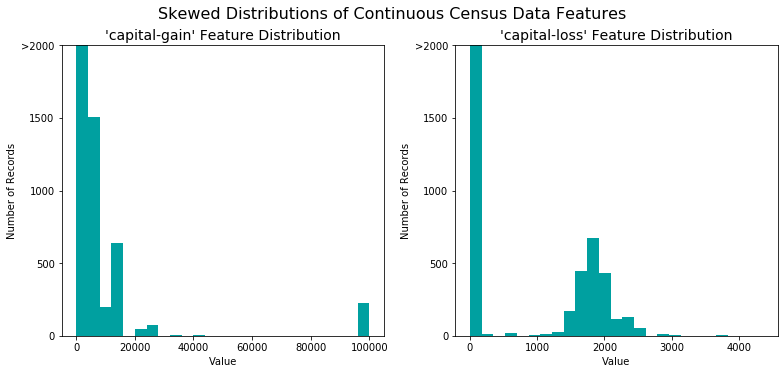

In [3]:
# Split the data into features and target label
df_y_raw=df['income'].copy()
df_X_raw=df.drop('income',axis=1).copy()

# Visualize the skewed continuous features of Original data
vs.distribution(df)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

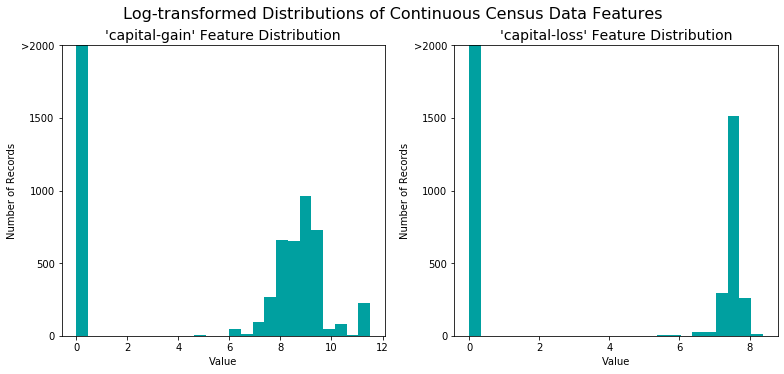

In [4]:
# Log Transform of the Skewed Features
skewed=['capital-gain','capital-loss']
df_X_logtf=pd.DataFrame(data=df_X_raw)
df_X_logtf[skewed]=df_X_raw[skewed].apply(lambda x:np.log(x+1))

#Visualize the new log distributions
vs.distribution(df_X_logtf,transformed=True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler

from sklearn.preprocessing import StandardScaler

# Initialize a scaler then  apply it to the features
scaler=StandardScaler()
numerical=['age','education-num','capital-gain','capital-loss','hours-per-week']

df_X_logtf_scaler=pd.DataFrame(data=df_X_logtf)
df_X_logtf_scaler[numerical]=scaler.fit_transform(df_X_logtf_scaler[numerical])

# Show an example of a record with scaling applied
display(df_X_logtf_scaler.head(5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.034201,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,2.815336,-0.222752,-0.078120,United-States
1,0.866417,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.300328,-0.222752,-2.326738,United-States
2,-0.041455,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.300328,-0.222752,-0.078120,United-States
3,1.093385,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.300328,-0.222752,-0.078120,United-States
4,-0.798015,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.300328,-0.222752,-0.078120,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
# One Hot encode the df_X_logtf_scaler data using pandas.get_dummies()

df_X=pd.get_dummies(df_X_logtf_scaler)

# Encode the 'income_raw' data to Numerical values
df_y=pd.get_dummies(df_y_raw)
df_y.drop(labels=df_y.columns[0],axis=1,inplace=True)

# Print the Numbers after one-hot encoding
encoded=list(df_X.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print(encoded)


103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [7]:
df_y.tail()

,>50K
45217,0
45218,0
45219,0
45220,0
45221,1


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# split the features and income data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(df_X,df_y,
                                              test_size=0.2,
                                              random_state=0)

# Show the Result of the split
print('Training set has {} samples'.format(X_train.shape[0]))
print('Testing set has {} samples'.format(X_test.shape[0]))



Training set has 36177 samples
Testing set has 9045 samples


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [9]:
# counting the ones as this is the Naive case. Note that 'income' is the 'income_raw' data
# Encode to Numerical values done in data preprocessing
TP=np.sum(df_y)[0]
FP=df_y.count()[0]-TP # Specify  to the Naive case

TN=0 # No predicted Negative in the Naive case
FN=0 # No predicted negatives in the naive case
n=TP+FP+TN+FN

# Calculate accuracy ,Precision,Recall
accuracy=(TP+TN)/n
recall=TP/(TP+FN)
precision=TP/(TP+FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta=0.5
fscore=(1+(beta**2))*((precision*recall))/(((beta**2)*precision)+recall)
# Print the results 

print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))




Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **
___
#### Logistic Regression 

* Application: Predicting whether a tumor is cancerous/benign based on diameter/volume
* Strengths: Linear Model, relatively interpretable and works well then variables are linearly seperable
* Weaknesses: Linear models also have a hard time capturing complexity in the data.
* Reason for candidacy: Example of a low variance model that will not be prone to overfitting
___
#### Decision Trees
* Application: Predicting whether a job candidate is worth hireing
* Strengths: Also very easy to interpret due to being a series of decisions
* Weaknesses: Tendency to overfit
* Reason for candidacy: Example of a low bias model that will be able to capture the complexity of the data while still being easier to interpret than using an ensemble
___
#### Gaussian Naive Bayes
* Application: Email spam classification
* Strengths: Makes strong predictions despite the assumption that features are independent ("naivety")
* Weaknesses: Bayes theorem is difficult to communicate to non-mathematical stakeholders and can often be beaten by other algorithms that have been well trained
* Reason for candidacy: Example of a model that will give good results despite inexperience in ML techniques

Source: Good [blog post](https://elitedatascience.com/machine-learning-algorithms) describing the strengths and weaknesses for supervised ML techniques.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model, it's important to create a training and predicting pipeline that allows for quick and effective training of models using various sizes of training data and performing predictions on the testing data.

In the code block below, the following will be implemented:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# Import two metrics from sklearn - fbeta score and accuracy score
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner,sample_size,X_train,y_train,X_test,y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results={}
    
    # fit the learner to the training data using slicing with sample size
    start=time() # Get start time
    learner=learner.fit(X_train[:sample_size],y_train[:sample_size])
    end=time() # Get end time
    
    # Calculate the training time
    results['train_time']=end-start
    
    # Get the predictions on the test set(X_test), then get predictions on the first 300 
    # training samples(X_train) using .predict()
    
    start=time() # get start time
    predictions_test=learner.predict(X_test)
    predictions_train=learner.predict(X_train[:300])
    end=time() # get end time
    
    # Calculate the total prediction time
    results['pred_time']=end-start
    
    # compute accuracy on the first 300 traing_samples which is y_train[:300]
    results['acc_train']=accuracy_score(predictions_train,y_train[:300])
    
    # compute accuracy on the test set using accuracy score
    results['acc_test']=accuracy_score(predictions_test,y_test)
    
    
    # set beta parameter
    beta=0.5
    
    # Compute F_score on the first 300 training samples
    
    results['f_train']=fbeta_score(y_train[:300],predictions_train,beta)
    
    # compute F_score on the test set
    results['f_test']=fbeta_score(y_test,predictions_test,beta)
    
    
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    
    # Return the results
    return results    
    

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/ana

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.


/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/udacity/data science/data_science/01_SUPERVISED_MODEL_LEARNING_MATERIAL/charity_machine_learning_project/visuals.py:118: UserWarning: Tight layout not applied. 

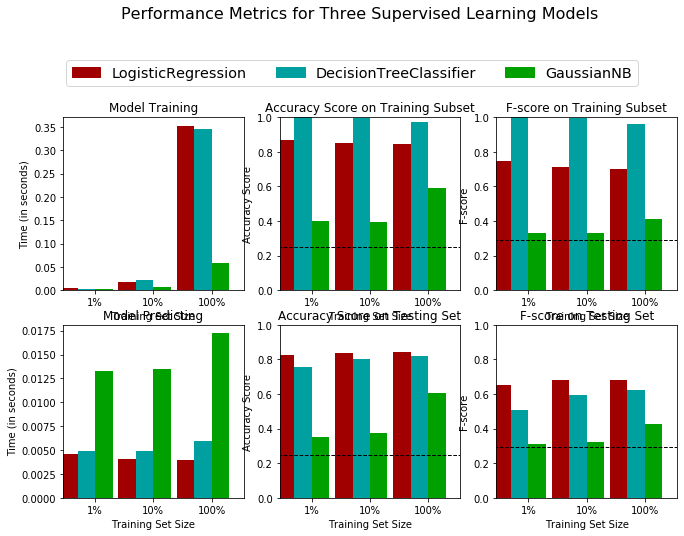

In [11]:
# Import the three supervised learning model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the three Model
clf_A=LogisticRegression(random_state=69)
clf_B=DecisionTreeClassifier(random_state=69)
clf_C=GaussianNB()

# Calculate the Number of samples for 1%,10% and 100% of the training data
# samples_10 is 10% of samples_100 (ensure to set the count of the values to be int and not float)
# samples_1 is 1% of samples_100 (ensure to set the count of the values to be 'int not float')
samples_100=len(y_train)
samples_10=int(len(y_train)*10/100)
samples_1=int(len(y_train)*1/100)

# Collect Results on the Learner
results={}
for clf in [clf_A,clf_B,clf_C]:
    clf_name=clf.__class__.__name__
    results[clf_name]={}
    
    for i,samples in enumerate([samples_1,samples_10,samples_100]):
        results[clf_name][i]= \
        train_predict(clf,samples,X_train,y_train,X_test,y_test)
        
    
# Run metrics visualization for three supervised model choosen
vs.evaluate(results,accuracy,fscore)

In [12]:
results

{'LogisticRegression': {0: {'train_time': 0.004120826721191406,
   'pred_time': 0.004597187042236328,
   'acc_train': 0.8666666666666667,
   'acc_test': 0.8277501381978994,
   'f_train': 0.7465277777777778,
   'f_test': 0.6506592346446565},
  1: {'train_time': 0.01690530776977539,
   'pred_time': 0.004059314727783203,
   'acc_train': 0.85,
   'acc_test': 0.839690436705362,
   'f_train': 0.7115384615384616,
   'f_test': 0.679836365593713},
  2: {'train_time': 0.3533473014831543,
   'pred_time': 0.003912210464477539,
   'acc_train': 0.8466666666666667,
   'acc_test': 0.8420121614151465,
   'f_train': 0.6985294117647058,
   'f_test': 0.6833039327591574}},
 'DecisionTreeClassifier': {0: {'train_time': 0.0030989646911621094,
   'pred_time': 0.004887819290161133,
   'acc_train': 1.0,
   'acc_test': 0.7536760641238254,
   'f_train': 1.0,
   'f_test': 0.5087832915081357},
  1: {'train_time': 0.022418975830078125,
   'pred_time': 0.004882097244262695,
   'acc_train': 0.9966666666666667,
   'acc

In [13]:
df_results_logit=pd.DataFrame(results['LogisticRegression'])
df_results_tree=pd.DataFrame(results['DecisionTreeClassifier'])
df_results_nb=pd.DataFrame(results['GaussianNB'])

In [14]:
df_results_logit

,0,1,2
train_time,0.004121,0.016905,0.353347
pred_time,0.004597,0.004059,0.003912
acc_train,0.866667,0.850000,0.846667
acc_test,0.827750,0.839690,0.842012
f_train,0.746528,0.711538,0.698529
f_test,0.650659,0.679836,0.683304


In [15]:
df_results_tree

,0,1,2
train_time,0.003099,0.022419,0.345781
pred_time,0.004888,0.004882,0.005902
acc_train,1.000000,0.996667,0.970000
acc_test,0.753676,0.800663,0.817468
f_train,1.000000,0.997191,0.963855
f_test,0.508783,0.592123,0.625637


In [16]:
df_results_nb

,0,1,2
train_time,0.002191,0.006976,0.059498
pred_time,0.013255,0.013465,0.017248
acc_train,0.400000,0.393333,0.593333
acc_test,0.351797,0.375014,0.604533
f_train,0.333333,0.328704,0.412500
f_test,0.310134,0.323170,0.425036


In [17]:
df_results_logit.iloc[4]

0    0.746528
1    0.711538
2    0.698529
Name: f_train, dtype: float64

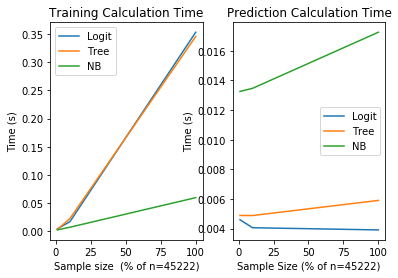

In [18]:
# Plot
plt.subplot(1,2,1)
plt.plot([1,10,100],df_results_logit.iloc[0],label='Logit')
plt.plot([1,10,100],df_results_tree.iloc[0],label='Tree')
plt.plot([1,10,100],df_results_nb.iloc[0],label='NB')
plt.ylabel('Time (s)')
plt.xlabel('Sample size  (% of n=45222)')
plt.legend()
plt.title('Training Calculation Time')
plt.subplot(1,2,2)
plt.plot([1,10,100],df_results_logit.iloc[1],label='Logit')
plt.plot([1,10,100],df_results_tree.iloc[1],label='Tree')
plt.plot([1,10,100],df_results_nb.iloc[1],label='NB')
plt.ylabel("Time (s)")
plt.xlabel("Sample Size (% of n=45222)")
plt.legend()
plt.title("Prediction Calculation Time")
plt.show()


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **
___
#### Metrics

* **Logistic Regression:** The F-score is both high and does not fall sharply moving from the training to the test set.
* **Decision Tree Classifier:** The F-score is incredibly high for the training set but then falls sharply for the testing set, which suggests that this classifier is overfitting heavily.
* **Naive Bayes Classifier:** The F-score is relatively close together but is scores very poorly, which suggests that this model has high bias that is not able to capture patterns in the data very well.

___
#### Calculation Time
* **Logistic Regression:** Takes a moderate amount of time to train but makes the fastest predictions once trained.
* **Decision Tree Classifier:** Takes the most amount of time to train but makes predictions relatively quickly once trained.
* Naive Bayes Classifier: Takes the least amount of time to train but takes the most amount of time to predict. 

___
#### Algorithm Stuitability for the Data
* **Logistic Regression:** Seems to be the most suitable because it fits the data relatively well. Although it does take a little bit more time to train the model, it is worth it because it gives good results.

* **Decision Tree Classifier:** Unsuitable because of severe overfitting, would require an ensemble in order to hinder overfitting. (Perhaps it is possible to fit the data with fewer features?)

* **Naive Bayes Classifier:** Seems to be an unsuitable algorithm but it does perform better as more data is given to it. However, the f-score and accuracy is probably too low to be raised to a high score by simply retrieving more data.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

Logistic regressions are linear models. What this means is that each input variable is multiplied by some value (parameter) and is summed together to give an output value. This value is then used to calculate another output using what is called a "sigmoid" function, which outputs values between 0 for very low values and 1 for very high values. This output between 0 and 1 represents the probabiliy of some kind of binary classification, for example if something does/doesn't occur. Normally, we say that values lower than 0.5 does not occur and the rest of the values do occur.

The model is trained *via.* what is called a "maximum liklihood estimator" (MLE) where it seeks estimates for each parameter such that the predicted probability of an individual earning more than \$50k is corresponds as closely as possible to the invidiuals observed status of earning more than $50k.

*Reference: “4.3 Logistic Regression.” An Introduction to Statistical Learning: with Applications in R, by Gareth James, Springer, 2017. *

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [19]:
# Import 'GridSearchCV','make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf=LogisticRegression(random_state=69)

# Create the parameter list  as you wish to tune using a dictionary
parameters={'penalty':['l1','l2'],'C':[0.001,0.01,1,10,100,1000],'multi_class':['ovr']}
"""
Note: Penalty refers to regularisation (lasso, ridge) and C is the value Lambda used 
in the regularisation
"""

# Make a fbeta_score scoring object using make_scorer()
scorer=make_scorer(fbeta_score,beta=0.5)
# perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj=GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameter using fit()
grid_fit=grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf=grid_fit.best_estimator_

# Make predictions using the unoptimized and Model
predictions=(clf.fit(X_train,y_train)).predict(X_test)
best_predictions=best_clf.predict(X_test)

# report the before and after scores
print('Unoptimized Model\n-------')
print('Accuracy Score on the testing data: {:.4f}'.format(accuracy_score(y_test,predictions)))
print('F-score on ther testing data: {:.4f}'.format(fbeta_score(y_test,predictions,beta=0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/p

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/ana

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atanuc73/ana

Unoptimized Model
-------
Accuracy Score on the testing data: 0.8420
F-score on ther testing data: 0.6833

Optimized Model
------
Final accuracy score on the testing data: 0.8417
Final F-score on the testing data: 0.6826


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.8420            | 0.8417          |
| F-score        | 0.6833            | 0.6826          |


**Answer: **

1. The Optimised model is only *very slightly* better than the unoptimised model. Considering that regularlisation is used to prevent overfitting, it makes sense that it did not do a lot to help a model that wasn't overfitting in the first place.

2. This model is effectively the same as the unoptimised LinReg. model. However it might be interesting to look at the coefficients that were chosen to see which features provided the most information.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

In order to see which features were the most important, I would have a look at the coefficients in the logistic regression and choose variables that have the highest absolute values. These will be variables that either predict a lot of information about what makes someone likely to earn more than $50k.

In [31]:
df_fs=pd.DataFrame({'feature':df_X.columns.tolist(),
                   'coeff':best_clf.coef_.tolist()[0]})
df_fs['abs_coeff']=abs(df_fs['coeff'])

df_fs.sort_values(by=['abs_coeff'],ascending=False).iloc[:15,:]

,feature,coeff,abs_coeff
29,marital-status_ Married-AF-spouse,2.169396,2.169396
30,marital-status_ Married-civ-spouse,1.781843,1.781843
65,native-country_ Columbia,-1.492988,1.492988
43,occupation_ Priv-house-serv,-1.294271,1.294271
96,native-country_ South,-1.189470,1.189470
39,occupation_ Farming-fishing,-1.022056,1.022056
71,native-country_ France,1.017258,1.017258
42,occupation_ Other-service,-0.933240,0.933240
54,relationship_ Wife,0.922268,0.922268
52,relationship_ Own-child,-0.852444,0.852444


Here we can see that the best predictor of having a salary greater than 50k a year is "marital-status_ Married-AF-spouse", marital-status_ Married-civ-spouse, native-country_ Columbia,occupation_ Priv-house-serv and the native-country_ South. All of this makes sense because these are factors that are well known to be strongly correlated with income.

It is worth noting that one of the strongest predictors of not making more than 50k a year is being female. This will be due to the gender wage gap that occurs because women make choices that hinder how much they earn due to psychological/biological reasons as well as social influences ([source](https://www.shrm.org/hr-today/public-policy/hr-public-policy-issues/Documents/Gender%20Wage%20Gap%20Final%20Report.pdf)) in addition to a huge penalty in pay when taking on motherhood ([source](https://www.nytimes.com/2018/02/05/upshot/even-in-family-friendly-scandinavia-mothers-are-paid-less.html)). 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atanuc73/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


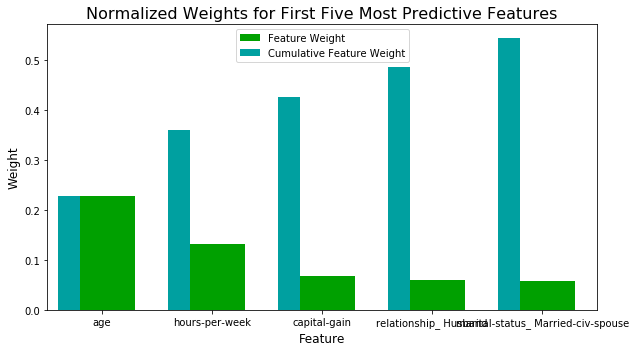

In [30]:
#  Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import ExtraTreesClassifier

# Train the supervised model on the Training set using fit method

model=ExtraTreesClassifier()
model.fit(X_train,y_train)

# extract the feature importance using .feature_importances_
importances=model.feature_importances_


# Plot
vs.feature_plot(importances,X_train,y_train)


### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

These results overlap quite a bit with the features that I selected with my logistic regression. 

What's suprising to me is that years in education was not selected, it's well known that education attainment is incredibly important when negotiating salary so I wonder why it was omitted here. Furthermore, both single and married relationship statuses were chosen which suggest that they're not as powerful predictors as the graph above suggests.

## Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*.

In [35]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced=X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# train on the 'best' model found from grid search earlier
clf=(clone(best_clf)).fit(X_train_reduced,y_train)

# Make New Predictions
reduced_predictions=clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8417
F-score on testing data: 0.6826

Final Model trained on reduced data
------
Accuracy on testing data: 0.7858
F-score on testing data: 0.5202


/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

Training time was not a factor. But I'm also working on a desktop computer with decent hardware so I don't expect this to be a problem unless I am performing deep learning or I'm using a really big dataset.

It also looks like the reduced data did not create a better model then when fitting on all of the data. This suggests that there were still important features that were not included in the reduced data. Furthermore, I suspect that the relationship status is not a great predictor as mentioned above which might contribute towards this as well.

In [37]:
### Now try with top 15 features
# Reduce the feature space
X_train_reduced=X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:15]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:15]]]

# train on the 'best' model found from grid search earlier
clf=(clone(best_clf)).fit(X_train_reduced,y_train)

# Make New Predictions
reduced_predictions=clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data with 15 features \n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final Model trained on full data
------
Accuracy on testing data: 0.8417
F-score on testing data: 0.6826

Final Model trained on reduced data with 15 features 
------
Accuracy on testing data: 0.8365
F-score on testing data: 0.6715
